# Sistemas de Recomendação - IGTI

Professor: [Matheus Mendonça](https://www.linkedin.com/in/matheusmendonca/)

In [ ]:
# importanto bibliotecas padrões
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# distância
from scipy.spatial.distance import pdist, hamming, cosine

## Capítulo 2. Fundamentos

### Aula 2.4 - Distância euclidiana

Distância euclidiana entre os vetores $n$-dimensionais $x$ e $y$:

$$d(x,y) = \sqrt{\sum_{i=1}^n(x_i-y_i)^2} = \|x-y\|_2.$$

In [ ]:
def euclidean_distance(x: np.array, y: np.array):
  """Calcula a distância euclidiana entre os arrays x e y."""
  
  # distância
  distance = np.sqrt(np.sum((x-y)**2))

  return distance

In [ ]:
# exemplos arrays
x = np.array([0, 1, 4])
y = np.array([0, 1, 4])

In [ ]:
# calcula distância euclidina
d = euclidean_distance(x, y)
print(f"A distância euclidiana entre x e y é {d}.") 

A distância euclidiana entre x e y é 0.0.


A Norma é geralmente calculada usando a seguinte operação numpy:

In [ ]:
np.linalg.norm?

In [ ]:
# outras funções para cálculo de norma
np.linalg.norm(x-y)

0.0

### Aula 2.5 - Distância de Hamming

Distância de Hamming entre dois vetores binários $n$-dimensionais $x$ e $y$ é dada por:

$$h(x,y) = \sum_{i=1}^n |x_i-y_i|.$$

É interessante dividir o resultado por $n$ para termos uma proporção dos elementos discordantes:

$$\bar{h}(x,y) = \frac{1}{n}\sum_{i=1}^n |x_i-y_i|,$$
assim, a distância normalizada fica no intervalo $[0, 1]$.

In [ ]:
def hamming_distance(x: np.array, y: np.array, normalize: bool = False):
  """Calcula a distância euclidiana entre os arrays x e y."""
  
  # distãncia
  factor = 1. if not normalize else 1/len(x)
  distance = factor * np.sum(np.abs(x-y))

  return distance

In [ ]:
# exemplos arrays BINÁRIOS
x = np.array([1, 0, 0, 1, 1, 0])
y = np.array([1, 1, 0, 0, 0, 0])

In [ ]:
# calcula distância de hamming
h = hamming_distance(x, y)
print(f"A distância de Hamming entre x e y é {h}.") 

A distância de Hamming entre x e y é 3.0.


In [ ]:
# calcula distância de hamming
h = hamming_distance(x, y, normalize=True)
print(f"A distância de Hamming normalizada entre x e y é {h}.") 

A distância de Hamming normalizada entre x e y é 0.5.


A distância de hamming é geralmente calculada utilizando a função hamming, da biblioteca scipy

In [ ]:
# outras funções para cálculo de distância de Hamming
hamming?

In [ ]:
hamming(x, y)

0.5

### Aula 2.6 - Produto interno e similaridade por cosseno

O produto interno entre dois vetores binários $n$-dimensionais $x$ e $y$ é dada por:

$$x \cdot y = x^Ty = \sum_{i=1}^nx_iy_i = \|x\|\|y\|\cos(x,y).$$

A similaridade de cossenos entre $x$ e $y$ é, então, dada por:
$$cos(x,y) = \frac{x \cdot y}{\|x\|\|y\|}.$$

In [ ]:
# exemplos arrays BINÁRIOS
x = np.array([1, 0, 0, 1, 1, 1]).reshape(-1, 1)
y = np.array([1, 1, 0, 0, 1, 0]).reshape(-1, 1)

In [ ]:
print("x:\n", x)
print("y:\n", y)

x:
 [[1]
 [0]
 [0]
 [1]
 [1]
 [1]]
y:
 [[1]
 [1]
 [0]
 [0]
 [1]
 [0]]


Primeiramente, como calcular o produto interno:

In [ ]:
# produto interno
# OBS.: o '@' é um operador do numpy para multiplicação de matrizes
x.T @ y

array([[2]])

In [ ]:
# produto interno
np.sum(x * y)

2

Ao realizar o produto interno, geralmente se usa a operação .dot do numpy:

In [ ]:
np.dot?

In [ ]:
np.dot(x.ravel(), y.ravel()) # o '.ravel' transforma a array coluna no formato de linha

2

Agora que sabemos como calcular o produto interno, podemos passar para a parte de 'Similaridade por Cossenos'.

In [ ]:
def cosine_similarity(x: np.array, y: np.array):
  """Calcula a similaridade de cossenos entre os arrays x e y."""
  
  cosine_sim = np.dot(x, y)/(np.linalg.norm(x) * np.linalg.norm(y))

  return cosine_sim 

In [ ]:
# calcula a similaridade de cossenos
c = cosine_similarity(x.ravel(), y.ravel())
print(f"A similaridade de cossenos entre x e y é {c}.") 

A similaridade de cossenos entre x e y é 0.5773502691896258.


A similaridade por cossenos é geralmente calculada utilizando a função '**cosine**', da biblioteca scipy

In [ ]:
# outras funções para cálculo de similaridade de cossenos
cosine?

Entretanto, a função cosine calcula a DISTÂNCIA dos cossenos.

Conforme já visto, DISTÂNCIA e SIMILARIDADE são **complementares**. Quanto MAIOR a distância MENOR a similaridade.

Assim, caso queira encontrar a similaridade usando a função **cosine**, faça **'1 - cosine(x,y)'**

In [ ]:
1 - cosine(x.ravel(), y.ravel())

0.5773502691896257

### Aula 2.7 - Distância euclidiana vs similaridade por cossenos

Relembrando que:

- Distância Euclidiana: é como se pegássemos uma régua e víssemos a DISTÂNCIA entre a laranja e a maçã.

- Similaridade por Cossenos: olha mais para o ângulo entre os dois vetores. O cosseno permite entender se os dois vetores estão indo para o mesmo sentido e não olha muito para a magnitude desses vetores.

Nesta prática, será entendido quando é melhor usar a Distância Euclidiana e quando usar Similaridade por Cossenos.

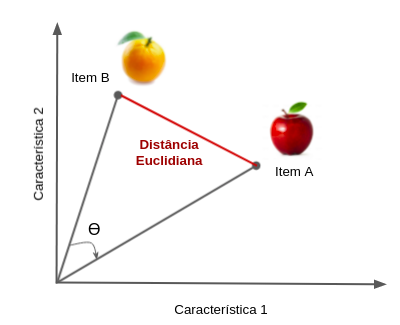

A prática será verificar a SIMILARIDADE entre dois textos.

In [ ]:
# para instalar: descomentar a linha e executar a célula
!pip install wikipedia

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11695 sha256=39081d4d0084f22a1ca4008c7c0f0111ef1c4d05981c8e241bdc54fde24fccd1
  Stored in directory: /root/.cache/pip/wheels/07/93/05/72c05349177dca2e0ba31a33ba4f7907606f7ddef303517c6a
Successfully built wikipedia


In [ ]:
# wikipedia
import wikipedia

In [ ]:
# configurando para o português
wikipedia.set_lang("pt")

In [ ]:
# queries
query_1 = wikipedia.page("Inteligência Artificial")
query_2 = wikipedia.page("Futebol")
query_3 = wikipedia.page("Aprendizado de máquinas")
query_4 = wikipedia.page("Voleibol")

In [ ]:
query_1.title

'Inteligência artificial'

In [ ]:
query_1.url

'https://pt.wikipedia.org/wiki/Intelig%C3%AAncia_artificial'

In [ ]:
query_1.content

'Na tecnologia, a Inteligência Artificial (de sigla: IA; do inglês: Artificial Intelligence, de sigla: AI) é a inteligência demonstrada por máquinas ao executar tarefas complexas associadas a seres inteligentes, além de também ser um campo de estudo acadêmico, no qual o principal objetivo é de executar funções de modo autônomo. \nÉ um conceito amplo e que recebe tantas definições quanto significados diferentes à palavra inteligência. É possível considerar algumas características básicas desses sistemas, como a capacidade de raciocínio (aplicar regras lógicas a um conjunto de dados disponíveis para chegar a uma conclusão), aprendizagem (aprender com os erros e acertos para que no futuro possa agir de maneira mais eficaz), reconhecer padrões (tanto padrões visuais e sensoriais, como também padrões de comportamento) e inferência (capacidade de conseguir aplicar o raciocínio nas situações do nosso cotidiano).O desenvolvimento da área de estudo começou logo após a Segunda Guerra Mundial, co

Usaremos uma classe do sklearn ('CountVectorizer') que tokeniza o texto. 

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# extração de características de um texto
cv = CountVectorizer()
X = np.array(cv.fit_transform([query_1.content,
                               query_2.content,
                               query_3.content,
                               query_4.content]).todense())

In [ ]:
# número de palavras em cada página
print("Inteligência Artificial ", len(query_1.content.split()), "\n"
      "Futebol \t\t", len(query_2.content.split()), "\n"
      "Aprendizado de Máquinas ", len(query_3.content.split()), "\n"
      "Voleibol \t\t", len(query_4.content.split()))

Inteligência Artificial  11555 
Futebol 		 10657 
Aprendizado de Máquinas  4135 
Voleibol 		 4829


Cálculo da distância euclidiana e similaridade por cossenos usando as funções que estruturamos anteriormente neste notebook.

In [ ]:
# distância euclidiana
print("Inteligência Artificial - Futebol \t\t\t", euclidean_distance(X[0], X[1]), "\n"
      "Inteligência Artificial - Aprendizado de Máquinas \t", euclidean_distance(X[0], X[2]), "\n"
      "Inteligência Artificial - Voleibol \t\t\t", euclidean_distance(X[0], X[3]))

Inteligência Artificial - Futebol 			 501.76189572345965 
Inteligência Artificial - Aprendizado de Máquinas 	 648.5823000976823 
Inteligência Artificial - Voleibol 			 714.2723570179655


Calculando a distância euclidiana, esperamos que textos similares tenham uma distância MENOR.

Entretanto, como podemos ver acima, isso não acontece: a menor distância aparece entre 'Inteligência Artificial - Futebol' e não 'Inteligência Artificial - Aprendizado de Máquinas'.

Isso acontece pois a distância euclidiana leva em consideração basicamente a distância (uma régua) entre dois pontos. Se esses dois pontos estão mais próximos em relação à sua magnitude (tamanho), naturalmente eles terão uma distância menor, mesmo que seus vetores estejam com ângulos mais distintos. Ou seja, como os textos de Inteligência Artificial e Futebol possuem mais palavras, eles naturalmente terão uma magnitude maior e a chance de terem uma distância menor é alta.

In [ ]:
# similaridade por cossenos
print("Inteligência Artificial - Futebol \t\t\t", cosine_similarity(X[0], X[1]), "\n"
      "Inteligência Artificial - Aprendizado de Máquinas \t", cosine_similarity(X[0], X[2]), "\n"
      "Inteligência Artificial - Voleibol \t\t\t", cosine_similarity(X[0], X[3]))

Inteligência Artificial - Futebol 			 0.8657123785865856 
Inteligência Artificial - Aprendizado de Máquinas 	 0.9166482753612866 
Inteligência Artificial - Voleibol 			 0.8257818771512007


Quando calculamos a similaridade por cossenos nós não ficamos preocupados com a quantidade de palavras de cada texto e sim com seu CONTEÚDO.

Se um texto está falando sobre futebol mas possui apenas um parágrafo e um outro texto também fala de futebol mas é um livro, eu quero que esses dois vetores tenham uma similaridade ALTA! O conteúdo dos dois é o mesmo embora a quantidade de palavras se difira.

Ao calcularmos a similaridade por cossenos acima vemos que, agora sim, a similaridade é maior entre 'Inteligência Artificial - Aprendizado de Máquinas'.

Agora vamos exercitar com um exemplo de tweet sobre futebol.

Veremos com que texto ele terá mais similaridade por cossenos.

In [ ]:
# categorizanto um tweet
tweet = "romário e ronaldo são os melhores atacantes que já vi jogar... dentro da pequena área era sempre gol!"
t = np.array(cv.transform([tweet]).todense())[0]

Por conta da magnitude de textos, sabemos que a distância euclidiana não é uma boa para se verificar a frase:

In [ ]:
# tweet vs páginas com distância euclidiana
print("tweet - Inteligência Artificial \t", euclidean_distance(t, X[0]), "\n"
      "tweet - Futebol \t\t\t", euclidean_distance(t, X[1]), "\n"
      "tweet - Aprendizado de Máquinas \t", euclidean_distance(t, X[2]), "\n"
      "tweet - Voleibol \t\t\t", euclidean_distance(t, X[3]))

tweet - Inteligência Artificial 	 998.190863512585 
tweet - Futebol 			 821.0408028837544 
tweet - Aprendizado de Máquinas 	 403.92078431296403 
tweet - Voleibol 			 384.912977177959


Veremos então pela similaridade por cossenos:

In [ ]:
# tweet vs páginas com similaridade por cossenos
print("tweet - Inteligência Artificial \t", cosine_similarity(t, X[0]), "\n"
      "tweet - Futebol \t\t\t", cosine_similarity(t, X[1]), "\n"
      "tweet - Aprendizado de Máquinas \t", cosine_similarity(t, X[2]), "\n"
      "tweet - Voleibol \t\t\t", cosine_similarity(t, X[3]))

tweet - Inteligência Artificial 	 0.15045738229580527 
tweet - Futebol 			 0.18287014432287246 
tweet - Aprendizado de Máquinas 	 0.11430235112545817 
tweet - Voleibol 			 0.17611644436368035


### Aula 2.8 - O mal da dimensionalidade

In [ ]:
# distâncias entre [1]^n e [0]^n,
# onde [x]^n é o vetor composto apenas por x n-dimensional (tamanho n)
# a distância Euclidiana entre esses vetores é dada por sqrt(n)

# users
n = 1000
user_a = np.ones(n)
user_b = np.zeros(n)

# distance for each dimension
euclidean_distance = np.sqrt(np.cumsum((user_a - user_b)**2))  # sqrt(n)

Neste exemplo, vemos a partir do gráfico que a distância não para de aumentar. Ou seja, quanto maior a quantidade de atributos (n's) menor a similaridade fica.

Assim, à medida que a dimensão vai aumentando, algumas medidas de DISTÂNCIA deixam de ser representativas.

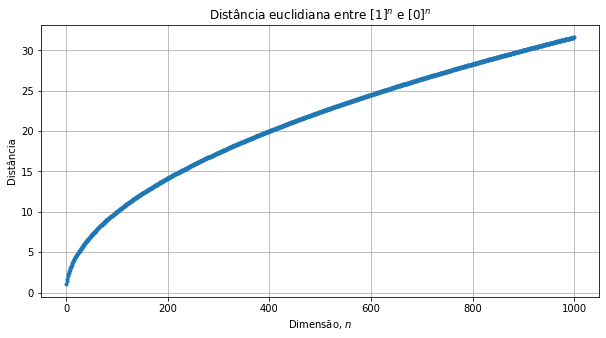

In [ ]:
# plot
plt.figure(figsize=(10, 5))
plt.plot(euclidean_distance, '.', label='Distância euclidiana')
plt.xlabel("Dimensão, $n$")
plt.ylabel("Distância")
plt.title('Distância euclidiana entre $[1]^n$ e $[0]^n$')
plt.grid()
plt.show()

Outro exemplo do mal da dimensionalidade:

In [ ]:
def distance_distribution(number_points = 5000, distance_type='euclidean'):

  # parameters
  n_range = [2, 8, 16, 32, 64, 256, 512, 1024]

  # plot
  plt.figure(figsize=(20, 10))
  for i, n in enumerate(n_range):

    # distance computation
    points = np.random.uniform(size=(number_points, n)) 
    pairwise_distance = pdist(points, metric=distance_type)
  
    # compute normalized distance distribution
    max_distance = np.max(pairwise_distance)
    distribution = pairwise_distance/max_distance
    xlabel_text = "Euclidean distance/Max distance"
    
    # standard deviation
    std = np.std(distribution)

    # plot
    plt.subplot(2, 4, i+1)
    plt.subplots_adjust(hspace=.3)
    plt.hist(distribution, density=True)
    plt.title(f'Dimension {n}, $\sigma$ = {std:.3f}')
    plt.xlabel(xlabel_text)
    plt.xticks(np.linspace(0, 1, 5))
  
  plt.show()

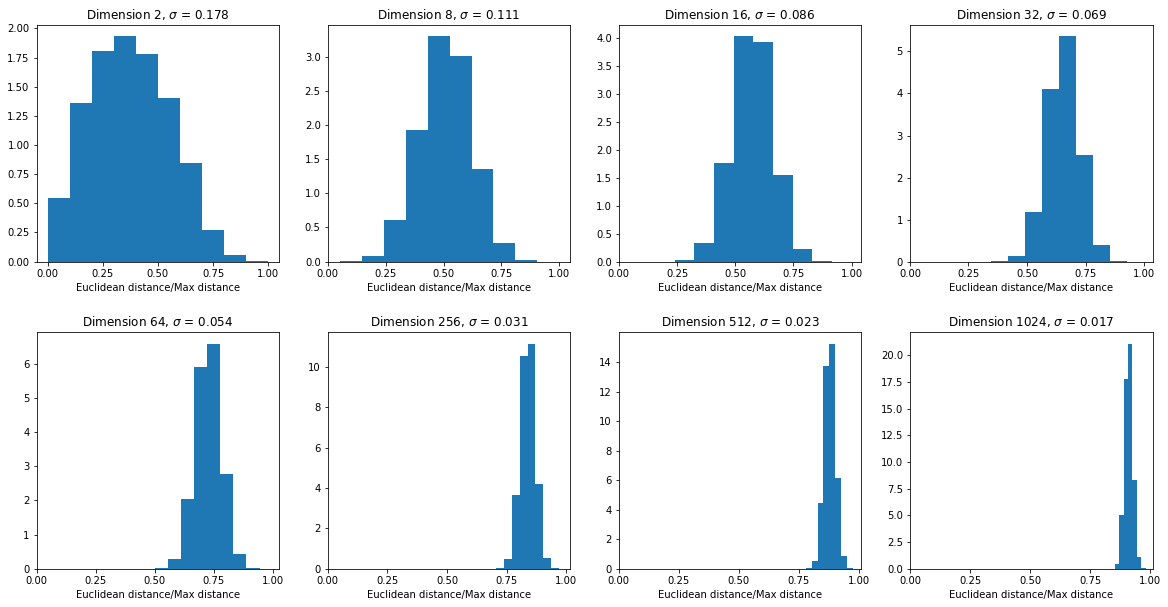

In [ ]:
# plot experiment
distance_distribution()

Quanto maior a dimensão, mais concentrado ficam os resultados das distâncias euclidianas.

Em modelos de machine learning, a variabilidade é ótima, porém o que vemos aqui é que quanto maior a dimensão, menos variabilidade temos. E não só isso, os resultados ficam todos concentrados "na borda" (próximo de 1).

## Capítulo 3. Recomendação baseada em conteúdo

### Aula 3.2 - Similaridade entre itens

In [ ]:
# dados
movies = ['Avatar 2009',
          'The Matrix',
          'Toy Story',
          'Ther Dark Knight',
          'Frozen',
          'The Incredibles']

Utilizaremos novamente o Wikipedia para verificar a listagem de filmes acima.

In [ ]:
def feature_extraction(movies: list):

  # voltando para o inglês
  wikipedia.set_lang("en")

  # query na wikipedia
  contents = []
  for movie in movies:
    # busca página
    print("Search item:", movie)
    page = wikipedia.page(movie+' movie') # Concatenando o título do filme com a palavra 'movie' para pesquisar

    # log
    print("Página:", page.title, page.url)

    # save content
    contents.append(page.content)

  # extração de features
  features = np.array(cv.fit_transform(contents).todense())

  return features

In [ ]:
# extração de features dos filmes baseado no conteúdo da wikipedia
features = feature_extraction(movies)

Search item: Avatar 2009
Página: Avatar (2009 film) https://en.wikipedia.org/wiki/Avatar_(2009_film)
Search item: The Matrix
Página: The Matrix https://en.wikipedia.org/wiki/The_Matrix
Search item: Toy Story
Página: Toy Story https://en.wikipedia.org/wiki/Toy_Story
Search item: Ther Dark Knight
Página: The Dark Knight https://en.wikipedia.org/wiki/The_Dark_Knight
Search item: Frozen
Página: Frozen (2013 film) https://en.wikipedia.org/wiki/Frozen_(2013_film)
Search item: The Incredibles
Página: The Incredibles https://en.wikipedia.org/wiki/The_Incredibles


In [ ]:
# dimensão
features.shape

(6, 8402)

In [ ]:
# similaridade por cossenos
print(f"{movies[2]} - {movies[0]} \t\t", cosine_similarity(features[2], features[0]), "\n"
      f"{movies[2]} - {movies[1]} \t\t", cosine_similarity(features[2], features[1]), "\n"
      f"{movies[2]} - {movies[3]} \t", cosine_similarity(features[2], features[3]), "\n"
      f"{movies[2]} - {movies[4]} \t\t", cosine_similarity(features[2], features[4]), "\n"
      f"{movies[2]} - {movies[5]} \t", cosine_similarity(features[2], features[5]), "\n")

Toy Story - Avatar 2009 		 0.9304595971230148 
Toy Story - The Matrix 		 0.9262458402585291 
Toy Story - Ther Dark Knight 	 0.914026717668736 
Toy Story - Frozen 		 0.9436556598416788 
Toy Story - The Incredibles 	 0.942221397619796 



### Aula 3.3 - Mapeamento de perfil de usuários

In [ ]:
# perfil dos filmes
movies_genres = {'Action': [1, 1, 0, 1, 0],
                 'Adventure': [1, 0, 1, 1, 0],
                 'Comedy': [0, 0, 1, 0, 0],
                 'Drama': [0, 0, 0, 0, 1]}
                 
movies = ['Avatar', 'Matrix', 'Toy Story', 'Batman', 'Pulp Fiction']

In [ ]:
# avaliações do usuário
user_ratings = {'Avatar': 1,
                'Matrix': 4,
                'Toy Story': 3,
                'Batman': 5,
                'Pulp Fiction': 2}

In [ ]:
# criando dataframe de filmes/gêneros
movies_profile = pd.DataFrame(movies_genres, index=movies)

In [ ]:
movies_profile

,Action,Adventure,Comedy,Drama
Avatar,1,1,0,0
Matrix,1,0,0,0
Toy Story,0,1,1,0
Batman,1,1,0,0
Pulp Fiction,0,0,0,1


In [ ]:
# construindo o perfil do usuário pela média
user_profile = movies_profile.mean(axis=0)
user_profile

Action       0.6
Adventure    0.6
Comedy       0.2
Drama        0.2
dtype: float64

In [ ]:
# gerando recomendações: similaridade por produto interno
similarity = movies_profile.values @ user_profile.values.reshape(-1, 1)
similarity

array([[1.2],
       [0.6],
       [0.8],
       [1.2],
       [0.2]])

In [ ]:
# ordenando as similaridades
i_sort = np.argsort(-similarity.ravel())

In [ ]:
# recomendações ordenadas
recommendations = np.array(movies)[i_sort].reshape(-1, 1)
print(recommendations)

[['Avatar']
 ['Batman']
 ['Toy Story']
 ['Matrix']
 ['Pulp Fiction']]


Agora veremos como ficaria a ordenação de filmes a partir também da avaliação que o usuário deu.

In [ ]:
# construindo o perfil pela média das notas normalizadas
ratings_array = np.array([user_ratings[movie] for movie in user_ratings.keys()])

In [ ]:
# normalizando as avaliações
ratings_array_n = ratings_array - ratings_array.mean()

In [ ]:
ratings_array_n

array([-2.,  1.,  0.,  2., -1.])

In [ ]:
# matriz de perfil dos filmes
profile_matrix = movies_profile.values
profile_matrix

array([[1, 1, 0, 0],
       [1, 0, 0, 0],
       [0, 1, 1, 0],
       [1, 1, 0, 0],
       [0, 0, 0, 1]])

In [ ]:
# gerando o perfil

# soma das avaliações normalizadas
sum = profile_matrix.T @ ratings_array_n.reshape(-1 , 1)

# número de filmes assistidos por gênero
non_zero = np.sum(profile_matrix > 0, axis=0)

# perfil
user_profile = sum.ravel()/non_zero

In [ ]:
user_profile

array([ 0.33333333,  0.        ,  0.        , -1.        ])

In [ ]:
# gerando recomendações: similaridade por produto interno
similarity = movies_profile.values @ user_profile.reshape(-1, 1)
similarity

array([[ 0.33333333],
       [ 0.33333333],
       [ 0.        ],
       [ 0.33333333],
       [-1.        ]])

In [ ]:
# ordendando as similaridades
i_sort = np.argsort(-similarity.ravel())

In [ ]:
# recomendações ordenadas
recommendations = np.array(movies)[i_sort].reshape(-1, 1)
print(recommendations)

[['Avatar']
 ['Matrix']
 ['Batman']
 ['Toy Story']
 ['Pulp Fiction']]


## Capítulo 4. Filtragem colaborativa

### Aula 4.3 - Cálculo da similaridade entre usuários

Para estudar a similaridade entre usuários, será criado um Dataframe de Matriz de Avaliações, onde temos:
- 5 usuários (U1,U2,U3,U4,U5);
- 7 itens (M1,M2,M3,...,M7).

OBS.: Os zeros da matriz não são referentes a notas negativas e sim à ausência de uma avaliação.

In [ ]:
# gera a matriz de avaliações
ratings = {'I1': [4.0, 5.0, 0.0, 4.1, 1.0],
           'I2': [0.0, 4.5, 0.0, 3.0, 4.0],
           'I3': [0.0, 4.0, 0.0, 0.0, 0.0],
           'I4': [4.7, 0.0, 1.5, 4.9, 2.5],
           'I5': [1.0, 0.0, 5.0, 0.0, 3.8],
           'I6': [0.0, 0.0, 4.0, 0.0, 1.0],
           'I7': [0.0, 0.0, 0.0, 3.0, 5.0]}
ratings = pd.DataFrame(ratings, index = ['U1', 'U2', 'U3', 'U4', 'U5'], dtype=float)

In [ ]:
ratings

,I1,I2,I3,I4,I5,I6,I7
U1,4.0,0.0,0.0,4.7,1.0,0.0,0.0
U2,5.0,4.5,4.0,0.0,0.0,0.0,0.0
U3,0.0,0.0,0.0,1.5,5.0,4.0,0.0
U4,4.1,3.0,0.0,4.9,0.0,0.0,3.0
U5,1.0,4.0,0.0,2.5,3.8,1.0,5.0


Cálculo da Similaridade de Cossenos entre o Usuário 1 e os demais.

In [ ]:
u1 = ratings.loc['U1'].values
u2 = ratings.loc['U2'].values
u3 = ratings.loc['U3'].values
u4 = ratings.loc['U4'].values
u5 = ratings.loc['U5'].values

# Similaridade entre cossenos dos usuários U1 e U2
cos_sim_U12 = cosine_similarity(u1, u2)
print(f"A similaridade de cossenos entre U1 e U2 é {cos_sim_U12:.2f}.") 

# Similaridade entre cossenos dos usuários U1 e U3
cos_sim_U13 = cosine_similarity(u1, u3)
print(f"A similaridade de cossenos entre U1 e U3 é {cos_sim_U13:.2f}.") 

# Similaridade entre cossenos dos usuários U1 e U4
cos_sim_U14 = cosine_similarity(u1, u4)
print(f"A similaridade de cossenos entre U1 e U4 é {cos_sim_U14:.2f}.") 

# Similaridade entre cossenos dos usuários U1 e U5
cos_sim_U15 = cosine_similarity(u1, u5)
print(f"A similaridade de cossenos entre U1 e U5 é {cos_sim_U15:.2f}.") 

A similaridade de cossenos entre U1 e U2 é 0.41.
A similaridade de cossenos entre U1 e U3 é 0.29.
A similaridade de cossenos entre U1 e U4 é 0.82.
A similaridade de cossenos entre U1 e U5 é 0.39.


Definição das funções para cálculo da similaridade por cossenos centralizada.

In [ ]:
def array_centering(v: np.array):
  """Subtraindo dos elementos não nulos pela média."""
  # cópia para evitar sobrescrita
  v = v.copy()

  # idexação para extrair elementos não nulos
  non_zeros = v > 0

  # substituição pela média
  v[non_zeros] = v[non_zeros] - np.mean(v[non_zeros]) + 1e-6

  return v

def centered_cosine_similarity(x: np.array, y: np.array):
  """Calcula a similaridade de cossenos centralizada entre os arrays x e y."""

  # subtraindo a média
  x = array_centering(x)
  y = array_centering(y)
  
  # similaridade por cossenos
  centered_cosine_sim = cosine_similarity(x, y)

  return centered_cosine_sim 

Cálculo da Similaridade de Cossenos Centralizada entre o Usuários 1 e os demais.

In [ ]:
# Similaridade de cossenos centralizada dos usuários U1 e U2
centered_cos_sim_U12 = centered_cosine_similarity(u1, u2)
print(f"A similaridade de cossenos centralizada entre U1 e U2 é {centered_cos_sim_U12:.2f}.") 

# Similaridade de cossenos centralizada dos usuários U1 e U3
centered_cos_sim_U13 = centered_cosine_similarity(u1, u3)
print(f"A similaridade de cossenos centralizada entre U1 e U3 é {centered_cos_sim_U13:.2f}.")

# Similaridade de cossenos centralizada dos usuários U1 e U4
centered_cos_sim_U14 = centered_cosine_similarity(u1, u4)
print(f"A similaridade de cossenos centralizada entre U1 e U4 é {centered_cos_sim_U14:.2f}.")

# Similaridade de cossenos centralizada dos usuários U1 e U5
centered_cos_sim_U15 = centered_cosine_similarity(u1, u5)
print(f"A similaridade de cossenos centralizada entre U1 e U5 é {centered_cos_sim_U15:.2f}.") 

A similaridade de cossenos centralizada entre U1 e U2 é 0.20.
A similaridade de cossenos centralizada entre U1 e U3 é -0.89.
A similaridade de cossenos centralizada entre U1 e U4 é 0.44.
A similaridade de cossenos centralizada entre U1 e U5 é -0.39.


Considerando uma filtragem colaborativa User-User, com agregação 
pela média simples e número de vizinhos igual a 2, qual a predição 
para a avaliação do usuário U1 ao item I2?

In [ ]:
# índices que possuem avaliação
i, j = np.where(ratings > 0)

In [ ]:
# seperando o conjunto de test: p% dos n itens com avaliações
n = len(i)
p = .1      # Separando 10% dos dados que temos para TESTE
np.random.seed(25)
idx_test = np.random.choice(n, size = int(p*n))

In [ ]:
# mascarando os dados
ratings_train = ratings.copy()
ratings_train.iloc[i[idx_test], j[idx_test]] = 0.

In [ ]:
# predição
y_pred = []
for k in range(len(idx_test)):
  y_pred.append(estimate_rating(ratings_train,
                user_index=j[idx_test][k],
                item_index=i[idx_test][k],
                aggregation='mean'))
y_pred = np.array(y_pred)

Predição para user_index=1, item_index=1,k=2, aggregation=mean é: 3.50


### Aula 4.4 - Filtragem colaborativa Item-Item

Será criada nova matriz de avaliações onde as colunas representam os usuários e os índices serão os itens.

Será feita abordagem item-item.

OBS.: Valores nulos são avaliações que não temos registros e não avaliações negativas.

In [ ]:
# matriz de avaliações
ratings = np.array([[1, 0, 3, 0, 0, 5, 0, 0, 5, 0, 4, 0],
                    [0, 0, 5, 4, 0, 0, 4, 0, 0, 2, 1, 3],
                    [2, 4, 0, 1, 2, 0, 3, 0, 4, 3, 5, 0],
                    [0, 2, 4, 0, 5, 0, 0, 4, 0, 0, 2, 0],
                    [0, 0, 4, 3, 4, 2, 0, 0, 0, 0, 2, 5],
                    [1, 0, 3, 0, 3, 0, 0, 2, 0, 0, 4, 0]])
columns = ['U'+str(i) for i in range(ratings.shape[1])]
index = ['M'+str(i) for i in range(ratings.shape[0])]

In [ ]:
# gerando o dataframe
ratings = pd.DataFrame(data=ratings, columns=columns, index=index, dtype=float)

In [ ]:
ratings

,U0,U1,U2,U3,U4,U5,U6,U7,U8,U9,U10,U11
M0,1.0,0.0,3.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0,4.0,0.0
M1,0.0,0.0,5.0,4.0,0.0,0.0,4.0,0.0,0.0,2.0,1.0,3.0
M2,2.0,4.0,0.0,1.0,2.0,0.0,3.0,0.0,4.0,3.0,5.0,0.0
M3,0.0,2.0,4.0,0.0,5.0,0.0,0.0,4.0,0.0,0.0,2.0,0.0
M4,0.0,0.0,4.0,3.0,4.0,2.0,0.0,0.0,0.0,0.0,2.0,5.0
M5,1.0,0.0,3.0,0.0,3.0,0.0,0.0,2.0,0.0,0.0,4.0,0.0


In [ ]:
def estimate_rating(ratings,
                    user_index=0,
                    item_index=0, 
                    k=2,
                    similarity=centered_cosine_similarity,
                    aggregation='mean'):
  """
  Estima a avaliação de um par (usuário, item) pela filtragem colaborativa
  Item-Item com a vizinhança de tamanho k.
  """
 
  # vetor de avaliações do item
  item_rating = ratings.iloc[item_index].values
 
  # calcula a similaridade entre item_index e os demais índices.
  items_indexes = np.array([i for i in range(ratings.shape[0]) if i != item_index])
  similarities = np.array([similarity(x=item_rating, y=ratings.iloc[i].values) for i in items_indexes])
  
  # acha os k itens mais semelhantes e que possuem avaliação
  items_rated = np.where(ratings.iloc[items_indexes, user_index] > 0)[0]
  sorted_similarities = np.argsort(-1*similarities[items_rated]) # array que ordena descrescente a similaridade
  k_closest = items_indexes[items_rated[sorted_similarities]][:k] # pegando apenas os top k itens

  # agregração
  ratings_k_closest = ratings.iloc[k_closest, user_index]
  if aggregation=='mean':
    prediction = np.mean(ratings_k_closest)
  elif aggregation=='wmean':
    similarities_k_closest = similarities[items_rated][sorted_similarities][:k]
    prediction = np.dot(np.abs(similarities_k_closest),
                        ratings_k_closest)/np.sum(np.abs(similarities_k_closest))
  else:
    raise ValueError(f"{aggregation} is an invalid value for aggregation!")
  
  # trata singularidades
  prediction = prediction if not np.isnan(prediction) else 3.
  
  # verbose
  print(f"Predição para user_index={user_index}, item_index={item_index}," \
        f"k={k}, aggregation={aggregation} é: {prediction:.2f}")
  return prediction

In [ ]:
# previsão para o usuário = 4, item = 0, k = 2, aggregation = wmean
prediction = estimate_rating(ratings,
                             user_index=4,
                             item_index=0,
                             aggregation='wmean')

Predição para user_index=4, item_index=0,k=2, aggregation=wmean é: 2.59


In [ ]:
# previsão para o usuário = 10, item = 0, k = 2, aggregation = wmean
prediction = estimate_rating(ratings,
                             user_index=10,
                             item_index=0,
                             aggregation='wmean')

Predição para user_index=10, item_index=0,k=2, aggregation=wmean é: 4.41


## Capítulo 7. Avaliação de sistemas de recomendação

### Aula 7.2 - Validação de sistemas de recomendações

In [ ]:
# matriz de avaliações
ratings

,U0,U1,U2,U3,U4,U5,U6,U7,U8,U9,U10,U11
M0,1.0,0.0,3.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0,4.0,0.0
M1,0.0,0.0,5.0,4.0,0.0,0.0,4.0,0.0,0.0,2.0,1.0,3.0
M2,2.0,4.0,0.0,1.0,2.0,0.0,3.0,0.0,4.0,3.0,5.0,0.0
M3,0.0,2.0,4.0,0.0,5.0,0.0,0.0,4.0,0.0,0.0,2.0,0.0
M4,0.0,0.0,4.0,3.0,4.0,2.0,0.0,0.0,0.0,0.0,2.0,5.0
M5,1.0,0.0,3.0,0.0,3.0,0.0,0.0,2.0,0.0,0.0,4.0,0.0


Para fazer o modelo, separaremos as avaliações que temos em mãos em TREINO e TESTE.

In [ ]:
# índices que possuem avaliação
i, j = np.where(ratings > 0)

In [ ]:
np.random.choice?

In [ ]:
# seperando o conjunto de test: p% dos n itens com avaliações
n = len(i)
p = .1      # Separando 10% dos dados que temos para TESTE
np.random.seed(25)
idx_test = np.random.choice(n, size = int(p*n))

Agora que pegamos 10% das avaliações realizadas e separamos para serem utilizadas no teste, vou verificar como ficou a matriz.

Para isso, deixarei a matriz original com o nome 'ratings' e a matriz alterada como 'ratings_train'.

In [ ]:
# mascarando os dados
ratings_train = ratings.copy()
ratings_train.iloc[i[idx_test], j[idx_test]] = 0.

In [ ]:
i[idx_test]

array([0, 4, 2])

In [ ]:
j[idx_test]

array([10,  4,  6])

In [ ]:
ratings

,U0,U1,U2,U3,U4,U5,U6,U7,U8,U9,U10,U11
M0,1.0,0.0,3.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0,4.0,0.0
M1,0.0,0.0,5.0,4.0,0.0,0.0,4.0,0.0,0.0,2.0,1.0,3.0
M2,2.0,4.0,0.0,1.0,2.0,0.0,3.0,0.0,4.0,3.0,5.0,0.0
M3,0.0,2.0,4.0,0.0,5.0,0.0,0.0,4.0,0.0,0.0,2.0,0.0
M4,0.0,0.0,4.0,3.0,4.0,2.0,0.0,0.0,0.0,0.0,2.0,5.0
M5,1.0,0.0,3.0,0.0,3.0,0.0,0.0,2.0,0.0,0.0,4.0,0.0


In [ ]:
ratings_train

,U0,U1,U2,U3,U4,U5,U6,U7,U8,U9,U10,U11
M0,1.0,0.0,3.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0,0.0,0.0
M1,0.0,0.0,5.0,4.0,0.0,0.0,4.0,0.0,0.0,2.0,1.0,3.0
M2,2.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,3.0,0.0,0.0
M3,0.0,2.0,4.0,0.0,5.0,0.0,0.0,4.0,0.0,0.0,2.0,0.0
M4,0.0,0.0,4.0,3.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,5.0
M5,1.0,0.0,3.0,0.0,3.0,0.0,0.0,2.0,0.0,0.0,4.0,0.0


In [ ]:
# valores reais
y_true = ratings.values[i[idx_test], j[idx_test]]

In [ ]:
y_true

array([4., 4., 3.])

In [ ]:
# predição
y_pred = []
for k in range(len(idx_test)):
  y_pred.append(estimate_rating(ratings_train,
                user_index=j[idx_test][k],
                item_index=i[idx_test][k],
                aggregation='mean'))
y_pred = np.array(y_pred)

Predição para user_index=10, item_index=0,k=2, aggregation=mean é: 3.00
Predição para user_index=4, item_index=4,k=2, aggregation=mean é: 4.00
Predição para user_index=6, item_index=2,k=2, aggregation=mean é: 4.00


In [ ]:
y_pred

array([3., 4., 4.])

In [ ]:
# RMSE
rmse = np.sqrt(np.mean((y_true-y_pred)**2))
print(f"RMSE de teste FC agregando pela média simples: {rmse: .2f}")

RMSE de teste FC agregando pela média simples:  0.82


In [ ]:
# predição
y_pred = []
for k in range(len(idx_test)):
  y_pred.append(estimate_rating(ratings_train,
                user_index=j[idx_test][k],
                item_index=i[idx_test][k],
                aggregation='wmean'))
y_pred = np.array(y_pred)

Predição para user_index=10, item_index=0,k=2, aggregation=wmean é: 3.87
Predição para user_index=4, item_index=4,k=2, aggregation=wmean é: 4.12
Predição para user_index=6, item_index=2,k=2, aggregation=wmean é: 4.00


In [ ]:
y_pred

array([3.87425191, 4.12078398, 4.        ])

In [ ]:
# RMSE
rmse = np.sqrt(np.mean((y_true-y_pred)**2))
print(f"RMSE de teste FC agregando pela média ponderada das similaridades: {rmse: .2f}")

RMSE de teste FC agregando pela média ponderada das similaridades:  0.59
